# Data Scientist Nanodegree

## Capstone Project

* Stiven López Giraldo
* May 17, 2018
---

## I.Definition

### Project Overwiew

Churn analysis is one of the most important problems for different companies, from sectors such as telecommunications to banking. A proper analysis together with a well-defined strategy allows to increase the user retention rate, and not only that, it can also help to focus on improving the user experience of those who are more likely to migrate to another campaign. Since users are a valuable asset for different companies and the constant creation of financial services from different companies in the sector, the need for customer retention increases.

The bank's objective is to find out which users are most likely to leave the company. Certain user characteristics are calculated in order to generate that probability, and depending on each user, a business action is taken to retain this user.

### Problem Statement
The solution to the problem of interest is to build a classification model that classifies users whether or not they will leave the company, in order to generate actions to retain users that are likely to leave. The model will be a Gradient Boosting that before adjusting will have a custom scikit-learn pipeline and pandas to do all the pre-processing.

The objective of developing such a model is to avoid data leakage problems and to have the same transformations in training data as in new data.

### Metrics

Our problem presents a class imbalance, although it is not as serious as certain problems that are usually found. In our case we have around 80% who are still clients and the remaining 20% who closed the account.

To evaluate performance, the F1 Score is used, which is the weighted average of precision and recall. Therefore, this score takes into account both false positives and false negatives and is useful for problems of unequal class distribution.

---
## II. Analysis

### Data exploration

The dataset provided by Kaggle contains details of the users of the bank, in addition to the binary variable that reflects whether a user closed the account or is still our user, which is the phenomenon that we are interested in predicting and understanding to help make decisions. better informed. .

The data set is loaded and divided into training, and testing using stratified sampling in the dependent variable, this with the aim of leaving the same proportions of the users who closed the account and those who are still customers. The following files remain:

* train.csv: training data with its respective target variable.
* test.csv: test data with its respective target variable.


The dimensions of each data set are as follows:

* train.csv has 13 variables (characteristics) and 7000 observations.
* test.csv has 13 variables (characteristics) and 3000 observations.

The variables of the data sets are:

* **RowNumber**: Row Numbers from 1 to 10000.
* **CustomerId**: Unique Ids for bank customer identification.
* **Surname**: Customer's last name.
* **CreditScore**: Credit score of the customer.
* **Geography**: The country from which the customer belongs.
* **Gender**: Male or Female.
* **Age**: Age of the customer.
* **Tenure**: Number of years for which the customer has been with the bank.
* **Balance**: Bank balance of the customer.
* **NumOfProducts**: Number of bank products the customer is utilizing.
* **HasCrCardBinary**: Flag for whether the customer holds a credit card with the bank or not.
* **IsActiveMember**: Binary Flag for whether the customer is an active member with the bank or not.
* **EstimatedSalary**: Estimated salary of the customer in Dollars.
* **Exited**: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

### Exploratory Visualization

The idea is to do an exploratory analysis on the data set, in order to understand the data more, but additionally to understand the distributions of the data and choose an appropriate algorithm, based on what the data shows us.

First, a univariate analysis is done together with descriptive statistics, then a multivariate analysis that gives us indications that variables may be the best predictors and have more discriminative power.

#### Univariate analysis

A univariate analysis will be made for the different variables, however, only the most interesting findings are shown so as not to generate as much noise in the notebook.

Some descriptive statistics of the numerical variables can be seen below:

In [1]:
import pandas as pd
from utilities.plotting import univariate_graph, barplot, plot_boxplot
data = pd.read_csv('data/Churn_Modelling.csv')
data['HasCrCard'] = data['HasCrCard'].apply(lambda x: 'Yes' if x == 1 else 'No')
data['IsActiveMember'] = data['IsActiveMember'].apply(lambda x: 'Yes' if x == 1 else 'No')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


We also have some statistics for the categorical variables:

In [2]:
data.describe(exclude='number')

,Surname,Geography,Gender,HasCrCard,IsActiveMember
count,10000,10000,10000,10000,10000
unique,2932,3,2,2,2
top,Smith,France,Male,Yes,Yes
freq,32,5014,5457,7055,5151


We see that the credit score variable presents a distribution very similar to the normal one, so it would not be necessary to apply any monotonic transformation, and without taking into account that the algorithm to be used does not need a specific distribution in the independent variables. In addition, unusual values (outliers) are presented below approximately 400.

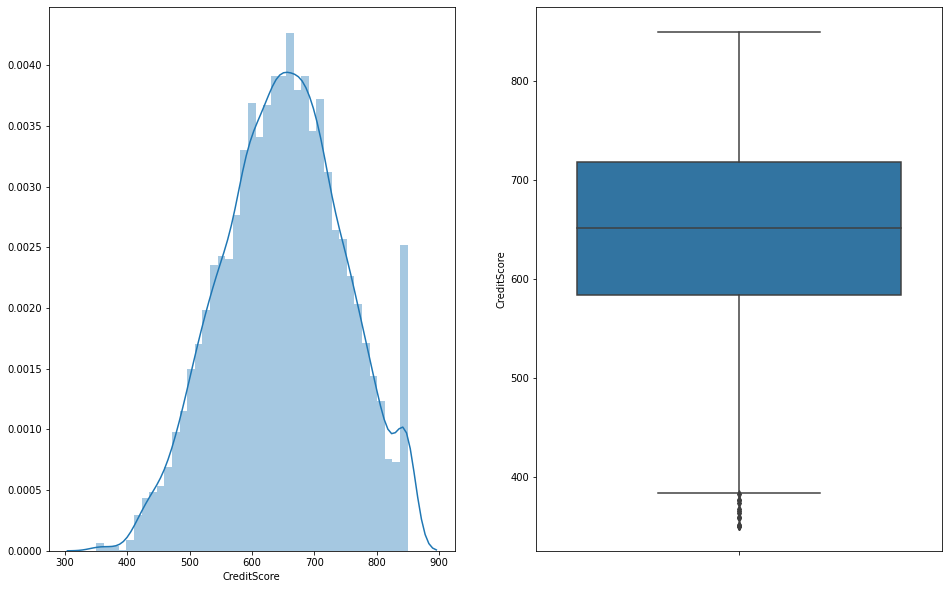

In [3]:

univariate_graph(df=data, col='CreditScore')

In the case of age, there is a positive bias in this variable, and we can see that most of the bank's users are around 40 years old, and due to the bias, it seems that it is not so usual for the bank to have very old users, even in the boxplot we can see that values above approximately 63 years are usually unusual ages with respect to a large part of the bank's users.

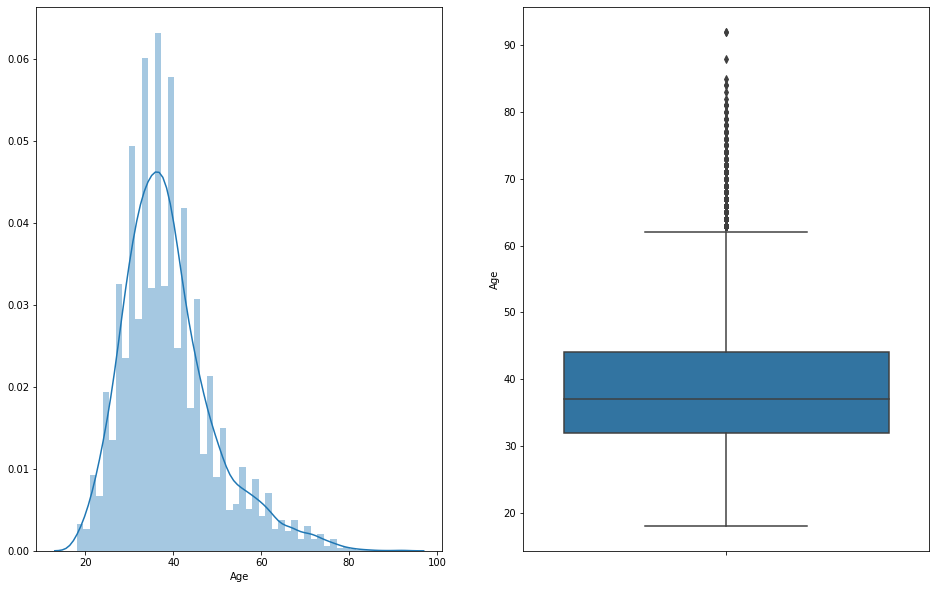

In [4]:
univariate_graph(df=data, col='Age')

The estimated salary is a very interesting variable in real life, however, in this data set it is not necessarily so and this is because the salary is distributed evenly, so it is very likely that the estimated salary will fall between 0 and 200000.

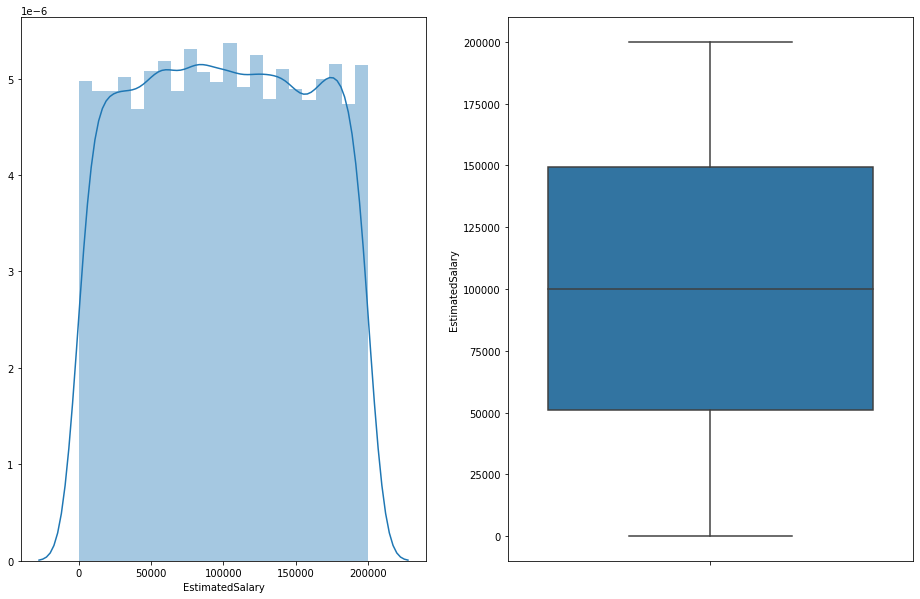

In [5]:
univariate_graph(df=data, col='EstimatedSalary')

In the bar graph we see that the bank only has clients from three countries, which are: France, Germany, and Spain; but it has much more of France. So a suggestion for the bank would be to start encouraging more German and Spanish users to use the bank's financial products and even diversify users from other nationalities.

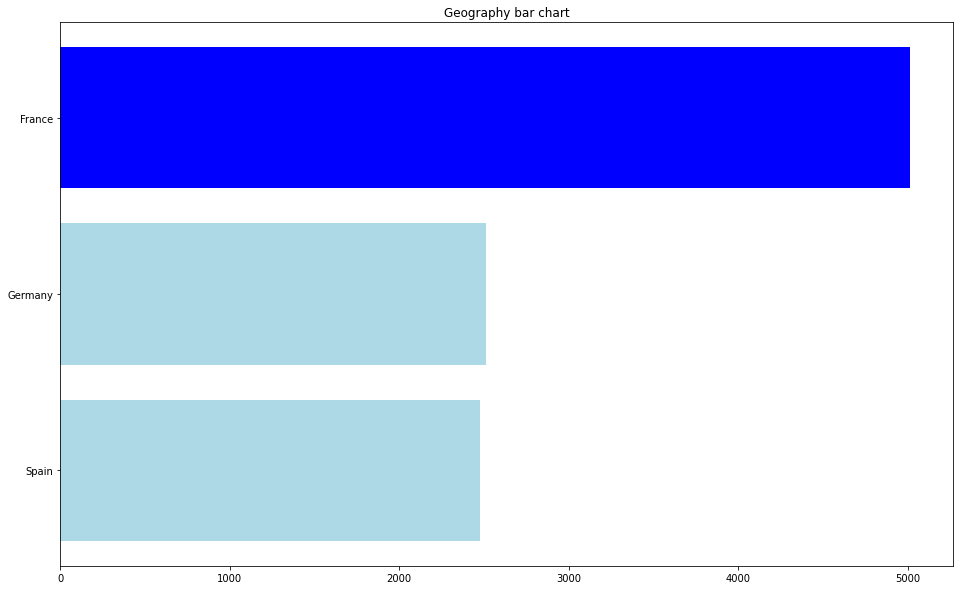

In [6]:
barplot(df=data, col='Geography')

In general there is no significant difference in the gender of the users, something that seems good to me and it is because if the proportion of one with respect to the other would be high, the model would possibly be falling into a gender bias simply because it has more observations of the one or the other.

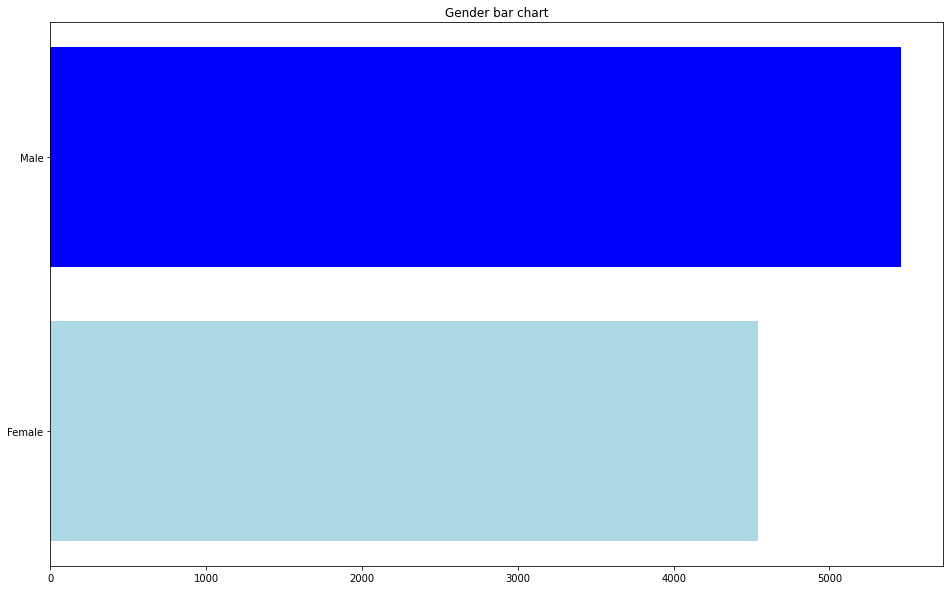

In [7]:
barplot(df=data, col='Gender')

We see that the majority of users have only one product, however, the difference between users who have one product and two is not much, while there are very few users who have three or four products. So the bank should encourage them to consume more financial products to improve profitability, but also by improving the experience and meeting the needs of different users. It would be necessary to review in real life the quantity of products offered by the bank, because if it has a small offer this could explain why certain users close the account and that they would not find everything they need in the bank.

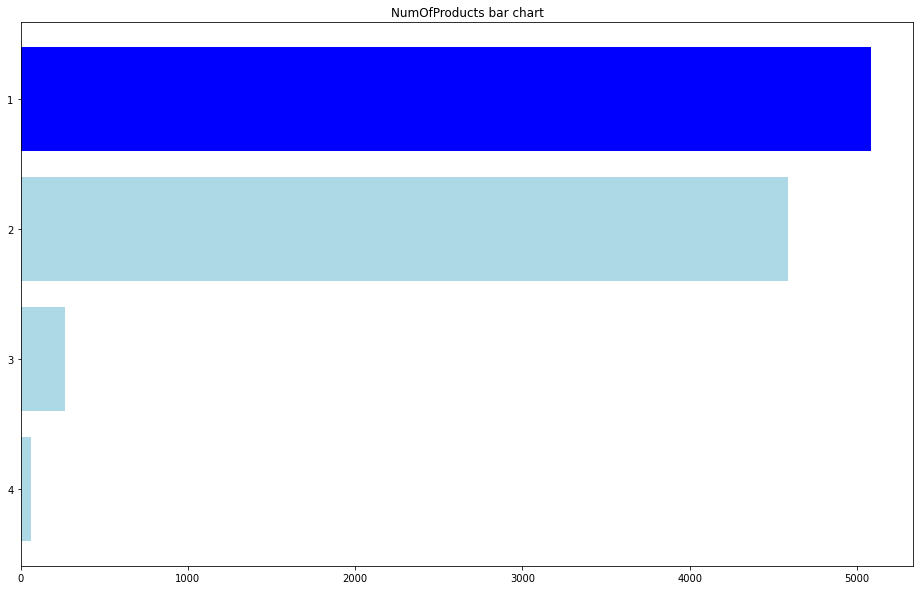

In [8]:
barplot(df=data, col='NumOfProducts')

#### Multivariate Analysis

In the multivariate analysis, the numerical variables that help to discriminate between users who close and those who do not have an account at the bank will be shown.

The variable such as age shows us something interesting, and that is that older people are more likely to close the account, while those below 40 usually leave it open and it is very unusual for users with high ages and with the account open, so this generates a hypothesis and it is something that was seen previously in the histogram and that is that users are usually younger, so it is possible that the bank's financial products are very focused on this younger segment.

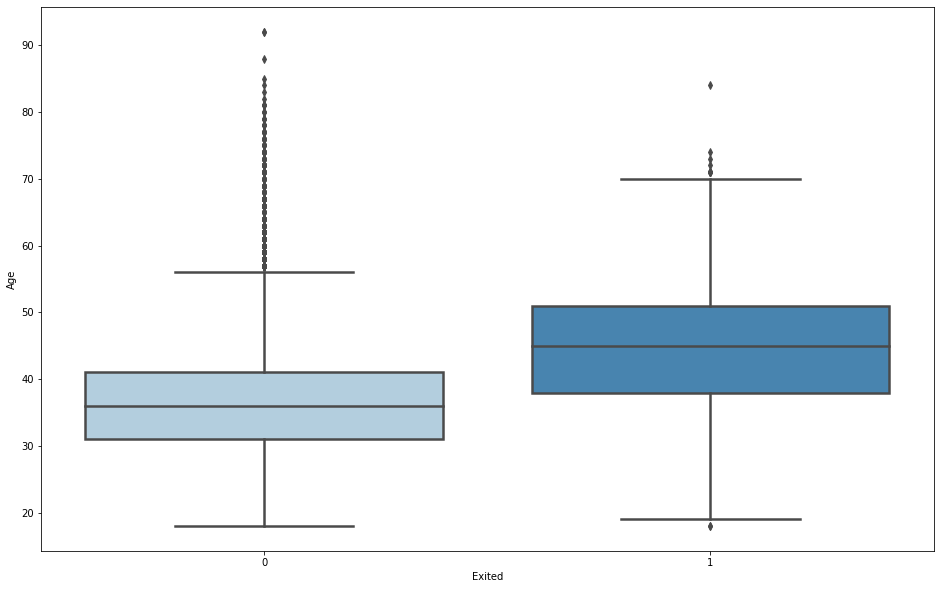

In [9]:
plot_boxplot(df=data, col='Age', label='Exited')

In addition to the above, the other variables presented a very similar distribution, both when the account was blocked or not.


### Benchmark

The benchmark chosen is to infer for each new user the most frequent value of the users who are in our sample, that is, for each new user it is predicted that he will remain in the bank and that he does not have a high probability of leaving.

If we do this on the test data, we get the following metrics:

* AUC : 0.5

* Accuracy: 0.8

* Precision: 0

* Recall: 0

* F1 Score: 0

---

## III. Methodology

### Data Preprocessing

In our case there are no missing values, nor duplicates. However, to the `HasCrCard` and `IsActiveMember` variables that come as one or zero for when it is positive or negative respectively, a transformation is applied so that they remain as Booleans (True or False) that are later transformed into dummies variables along with the categorical variables: Geography, and Gender. In the case of numeric variables, no monotonic transformation is done for them, since the algorithm is able to work perfectly with data with different numerical scales, so it is not necessary.

Here is a step-by-step discussion of preprocessing, which is the scikit-learn and pandas custom pipeline:

**I**. The transformation is done in boolean values for `HasCrCard`, and `IsActiveMember`.

**II**. The data is converted to numeric or categorical type as the case may be to improve performance, and in case any variable does not load as it should be.

**III**. Only the variables that serve to train the model are selected, variables such as id's, and names are not selected.

**IV**. Of the selected variables, the numerical and categorical variables are selected separately to apply the appropriate transformations to each type, in this case the categorical variables become dummy variables (hot coding) and the numerical variables apply standardization to the data.

**V**. The pipeline is adjusted, with which the same transformations will be applied to the new data, so things are guaranteed that there is no data leak.

When raw data is entered, it is passed through this pipeline, the aforementioned transformations are applied and the result is immediately passed to the estimator, which in this case is a GradientBoostingClassifier of scikit-learn, the data is adjusted and serialized the model to later make inferences.

### Implementation

In the previous point, the data preprocessing is mentioned, which is the combination of different custom pipelines that some classes of Scikit-Learn inherit and the transformations are done with Pandas, after that the data goes to the estimator. However, there was an interesting challenge when learning how to create custom pipelines to apply the transformations that one requires in each project, and not only those that are by default in scikit-learn.

### Refinement

In order to improve the result of the adjusted model, the best hyperparameters are searched using the search done by Amazon SageMaker, which is an informed search on hyperparameter distributions, which has good performance and is much faster than a grid search. .

The distribution spaces for the variables are:

* **max_depth**: It is the maximum depth of the tree, the bigger this hyperparameter is, the model will be more complex and there will be a greater risk of overfitting. A distribution space of (3, 5, 7) was established

* **subsample**: Proportion of subsample of training instances, that is, if we choose 0.5, 50% of the data will be randomly sampled to build the tree, and thus there will be a lower risk of overfitting. A distribution space of (0.7, 1.0) was established

* **learning_rate**: It was set to (0.05, 0.1)

---

## IV. Results

### Model Evaluation and Validation

After evaluating the performance of the model with respect to the benchmark, it was decided to leave the model with hyperparameter optimization because it presents better results and generally performs better than our benchmark. The results are shown below:

In [10]:
results = {'benchmark': [0.5, 0.8, 0.0, 0.0, 0.0],
           'gboosting': [0.73, 0.87, 0.78, 0.5, 0.61]}

results = pd.DataFrame.from_dict(results)
results.index = ['AUC', 'Accuracy', 'Precision', 'Recall', 'F1 score']
results

,benchmark,gboosting
AUC,0.5,0.73
Accuracy,0.8,0.87
Precision,0.0,0.78
Recall,0.0,0.50
F1 score,0.0,0.61


### Justification

The model evaluated in the test data showed better performance and obtained interesting metrics for not considering feature engineering where more variables could be created, there would probably be a more interesting better one in the current model.

The trained model will be used in a simple but functional web page, where the user's data is entered and returns a prediction if the account is closed or not.

### Reflection

In summary, a model with a custom pipeline was created for the transformations that are applied before training the model. This model is saved for later use through a Rest API to generate predictions or inferences through a web page.

It was challenging to build the custom pipeline because not many people do it, so I had to go through different articles and learn.